# Straka Bubble Test 🫧🫧🫧🫧

<div class="alert alert-block alert-success">

## Part 4: Analyzing $\texttt{PADDLE}$ Outputs

After running the simulation to completion in **Part 3**, the output directory (`straka_results`) should be populated by the following files: 

1. *straka.0000X.restart* (X ranging from 0 to 3), and testing.final.restart
2. *straka.out1.XXXXX.nc* (XXXXXX ranging from 00000-00030)

(if you used the notebook generated `.yaml` file, it will have the prefix *straka_made_in_notebook* instead)

These were generated since we had our simulation run for 900 seconds (`integration:tlim:900`), and had the following $\texttt{output}$ setting defined in our `.yaml` file: 

`type: restart: dt: 300.`

Meaning we had .restart files produced every 300 simulation seconds (0, 300, 600, 900 seconds and then an extra one at the end)

`type: netcdf: variables: [prim, uov] : dt: 30.`

Meaning we had .nc files (storing the primitive, and user output variables, temperature and potential temperature, defined in **Part 3**) every 30 simulation seconds. 

Now, we will combine our .nc files into a single output file and explore how to visualize our simulation results. We explore how to restart a simulation using the `.restart` files in Tutorial 2. 

</div>

<div class="alert alert-info">

## Combine .nc files 

For smaller outputs found in 2D simulations, you can combine our outputs into a single file with the following terminal command:

```
pd-combine 1 -o 'name_of_output_file'
```

where `pd-combine` is a $\texttt{PADDLE}$-specific command.

The '1' here corresponds to out1. In future simulations, we might have out1, out2, and out3. Here, we would run:

```
pd-combine 1,2,3 -o 'name_of_output_file'
```

In the next cell, we run the terminal command in the Jupyter notebook cell using the prefix '!'. 

In particular, we run a shell command [denoted by ()] that allows us to cd into the output directory and (&&) combine the files without changing our notebook's working directory. 

**NOTE: The following will delete your .nc files. If you wish to keep them, for whatever reason, copy them into a different directory.**

The .restart files will remain in this directory. 

In [1]:
# Combine our out1 files into straka_made_in_notebook-main.nc (or, straka-main.nc if you used the default .yaml file)

!(cd straka_results/ && pd-combine 1 -o main)

##########################
## Combine output files ##
##########################
Working on case straka_made_in_notebook...
Combining FITS output ...
Concatenating output field out1 ...
Combining output fields:  1 to main
Done.



<div class="alert alert-info">

## View straka-main.nc with $\texttt{ncview}$

We can use another terminal command that calls `ncview` to view our combined .nc file.

$\texttt{ncview}$ is a great tool for a quick look at our simulation's results. 

Checkout the next figure for how to use some of the ncview features. To exit out, just press the 'x' in the top left.

**NOTE: If you don't have ncview installed, view the INSTALLATION instructions of $\texttt{PADDLE}$**

<img src="../../images/ncview-tutorial-straka.png">

In [2]:
!(cd straka_results/ && ncview straka_made_in_notebook-main.nc)

# Or: if you used the .yaml file pre-included 
# !ncview straka-main.nc

Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

Note: no Ncview app-defaults file found, using internal defaults
calculating min and maxes for rho...


<div class="alert alert-info">

## Load in the nc file

We can also load the .nc file directly in a notebook. While this a bit more tedious than using $\texttt{ncview}$, it is useful for when you will want to (inevitably) analyze your simulations outputs in more detail (and make figures).

</div>

In [3]:
import netCDF4
import numpy as np

# Open the file
straka_output = netCDF4.Dataset('./straka_results/straka_made_in_notebook-main.nc', 'r')

# Or: if you used the .yaml file pre-included 
# straka_output = netCDF4.Dataset('straka-main.nc', 'r')

# Print the dimensions
# x1 is the coordinate of cell centers while x1f is cell boundaries (length is 1 longer)
print(straka_output.dimensions.keys())

# Print the stored variables
print(straka_output.variables.keys())

# Lets plot the temperature 
data_temperature = straka_output.variables['temp'][:]

# 31 frames
# 64 cells by 1 cell by 256 cells
print(np.shape(data_temperature))


dict_keys(['time', 'x1', 'x1f', 'x2', 'x2f', 'x3'])
dict_keys(['time', 'x1', 'x1f', 'x2', 'x2f', 'x3', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'temp', 'theta'])
(31, 64, 1, 256)


For another quick look (without worrying about converting cells to real spatial dimensions, and frame numbers to specific times), we can look at the following: 

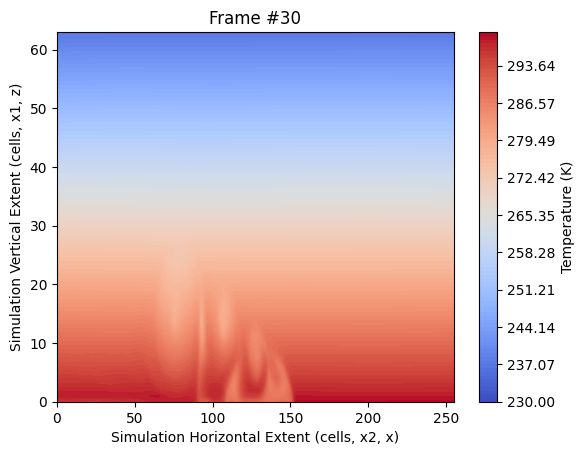

In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Loop over the time saved frames 
for t in range(np.shape(data_temperature)[0]):

    # Ensures that the last plot will be cleared 
    clear_output(wait = True)

    # Make a countour plot with really fine layers to capture eddies
    plt.contourf(data_temperature[t,:,0,:], cmap = 'coolwarm', levels = np.linspace(230,300,100))
    plt.colorbar(label = 'Temperature (K)')
    title = 'Frame #' + str(t)
    plt.title(title)
    plt.xlabel('Simulation Horizontal Extent (cells, x2, x)')
    plt.ylabel('Simulation Vertical Extent (cells, x1, z)')
    plt.show()

    # Delay, so that it doesn't go too fast 
    time.sleep(0.1)

Now, lets actually look at the physical units 

In [5]:
# Array of time for each frame, in seconds
data_time = straka_output.variables['time'][:]

# Array of center of cells for vertical direction
data_x1 = straka_output.variables['x1'][:]

# Array of center of cells for horizontal direction
data_x2 = straka_output.variables['x2'][:]

# Create meshgrid in order to plot 
Z, X = np.meshgrid(data_x2, data_x1)

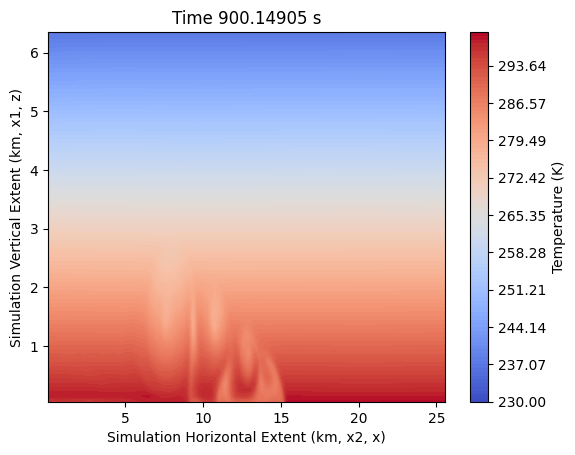

In [6]:
# Loop over the time saved frames 
for t in range(np.shape(data_temperature)[0]):

    # Ensures that the last plot will be cleared 
    clear_output(wait = True)

    # Make a countour plot with really fine layers to capture eddies
    plt.contourf(Z/1000,X/1000,data_temperature[t,:,0,:], cmap = 'coolwarm', levels = np.linspace(230,300,100))
    plt.colorbar(label = 'Temperature (K)')
    title = 'Time ' + str(data_time[t]) + ' s'
    plt.title(title)
    plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
    plt.ylabel('Simulation Vertical Extent (km, x1, z)')
    plt.show()

    # Delay, so that it doesn't go too fast 
    time.sleep(0.1)

<div class="alert alert-block alert-success">

You should have seen a beautiful bubble falling to the ground, and dispersing into density currents on the bottom boundary layer. Congratulations on reaching the end of your first $\texttt{PADDLE}$ tutorial!

In **Part 5**, we will see how to run all the code presented in this tutorial in terminal.